# 신경망 모델에서 옵티마이저 사용법

- 이진분류
- 사용 데이터: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

### 1. `Adam` optimizer 사용

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
                    Dense(100, input_dim=30, activation='relu'), 
                    Dense(24,  activation='relu'), 
                    Dense(1, input_dim=30, activation='sigmoid')
])

#### `Adam` 하이퍼 파라메터
- `learning_rate`: 0보다 크거나 같은 float 값. 학습률.
- `beta_1`: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- `beta_2`: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- `epsilon`: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- `decay`: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- `amsgrad`: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다

In [11]:
# 일단 그냥 하이퍼 파라미터 조정할 수 있다는 점만 알아두기
# 하이퍼 파라미터 조정은 나중에 더 학습 후 사용 
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, 
            epsilon=None, decay=0.0, amsgrad=False )

In [13]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer 기본 사용 -> optimizer = 'adam' (string)
# 여기서는 하이퍼파라미터 값 조정하여 adam 변수에 할당하여 optimizer = adam (변수)

In [16]:
hist = model.fit(X_train, y_train, validation_split = 0.2,
                 epochs = 100, batch_size=100, verbose=0)

In [17]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.9035


[0.24152758717536926, 0.9035087823867798]

In [31]:
y_acc = hist.history['accuracy']
y_loss = hist.history['val_loss']

xs = np.arange(1, len(y_acc)+1)

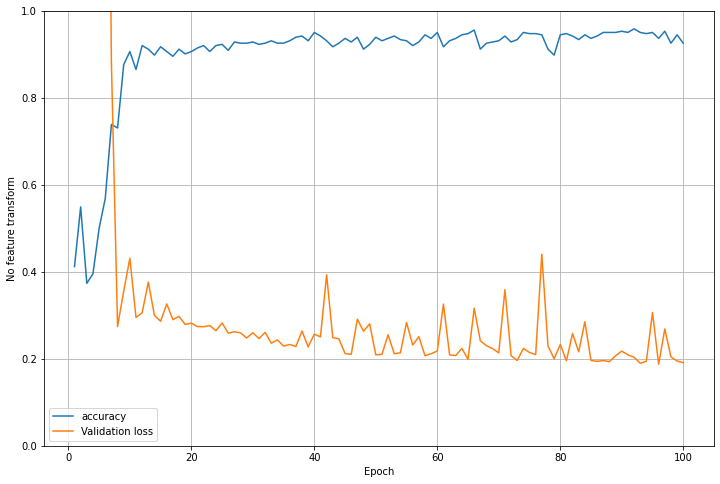

In [20]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='Validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylabel('No feature transform')
plt.ylim([0, 1])
plt.show()

### 2. `RMSprop` optimizer 사용

In [21]:
model2 = Sequential([
                    Dense(100, input_dim=30, activation='relu'), 
                    Dense(24,  activation='relu'), 
                    Dense(1, input_dim=30, activation='sigmoid')
])

#### `RMSprop` 하이퍼 파라메터
- `lr`: 0보다 크거나 같은 float 값. 학습률.
- `rho`: 0보다 크거나 같은 float 값.
- `epsilon`: 0보다 크거나 같은 float형 fuzz factor. None인 경우 `K.epsilon()`이 사용됩니다.
- `decay`: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.

In [25]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [26]:
model2.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [27]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2, 
                   epochs=100, batch_size=100, verbose=2)
# verbose = 0/1/2

Epoch 1/100
4/4 - 2s - loss: 24.6246 - accuracy: 0.4203 - val_loss: 2.0972 - val_accuracy: 0.4835 - 2s/epoch - 397ms/step
Epoch 2/100
4/4 - 0s - loss: 5.9688 - accuracy: 0.5192 - val_loss: 3.9578 - val_accuracy: 0.6703 - 50ms/epoch - 13ms/step
Epoch 3/100
4/4 - 0s - loss: 5.8464 - accuracy: 0.5247 - val_loss: 3.7774 - val_accuracy: 0.7253 - 60ms/epoch - 15ms/step
Epoch 4/100
4/4 - 0s - loss: 5.0212 - accuracy: 0.5769 - val_loss: 1.1839 - val_accuracy: 0.8242 - 57ms/epoch - 14ms/step
Epoch 5/100
4/4 - 0s - loss: 2.6758 - accuracy: 0.6346 - val_loss: 3.1939 - val_accuracy: 0.7582 - 50ms/epoch - 12ms/step
Epoch 6/100
4/4 - 0s - loss: 3.7228 - accuracy: 0.5769 - val_loss: 1.8639 - val_accuracy: 0.8242 - 54ms/epoch - 14ms/step
Epoch 7/100
4/4 - 0s - loss: 2.9458 - accuracy: 0.6016 - val_loss: 2.0771 - val_accuracy: 0.8242 - 59ms/epoch - 15ms/step
Epoch 8/100
4/4 - 0s - loss: 2.9411 - accuracy: 0.6126 - val_loss: 2.1993 - val_accuracy: 0.8242 - 62ms/epoch - 15ms/step
Epoch 9/100
4/4 - 0s - l

In [28]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.7633 - accuracy: 0.8684


[0.7632769346237183, 0.8684210777282715]

In [30]:
y_acc2 = hist2.history['accuracy']
y_loss2 = hist2.history['val_loss']

xs = np.arange(1, len(y_acc2)+1)

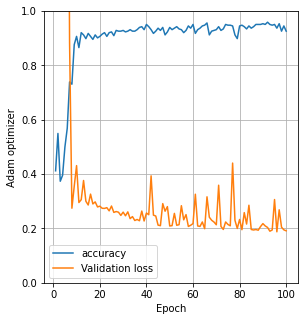

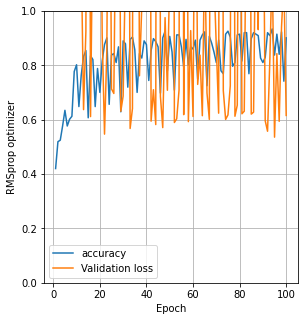

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='Validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Adam optimizer')
plt.ylim([0, 1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(xs, y_acc2, label='accuracy')
plt.plot(xs, y_loss2, label='Validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylabel('RMSprop optimizer')
plt.ylim([0, 1])
plt.show()